In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\customer_segmentation_data.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert purchase history to datetime
df['Purchase History'] = pd.to_datetime(df['Purchase History'], errors='coerce')

reference_date = df['Purchase History'].max() + pd.Timedelta(days=1)

# Compute RFM
rfm = df.groupby('Customer ID').agg(
    Recency=('Purchase History', lambda x: (reference_date - x.max()).days),
    Frequency=('Purchase History', 'count'),
    Monetary=('Premium Amount', 'sum')
)

print(rfm.head())

             Recency  Frequency  Monetary
Customer ID                              
1              338.0          8    110417
5                NaN          0      3713
23               NaN          0      2791
37             163.0          1      1897
49            1099.0          1      4512


In [11]:
rfm.rename(columns={
    'Purchase History': 'Recency',
    'Purchase History': 'Monetary'
}, inplace=True)

rfm['Frequency'] = rfm['Recency']  # fix duplicate naming issue


In [14]:
# Create RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(float)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(float)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(float)

rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)





In [15]:
# Segment assignment
def segment_customer(row):
    if row['RFM_Score'] >= 9:
        return 'Champions'
    elif row['RFM_Score'] >= 7:
        return 'Loyal'
    elif row['RFM_Score'] >= 5:
        return 'Potential Loyalist'
    elif row['RFM_Score'] >= 3:
        return 'At Risk'
    else:
        return 'Hibernating'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

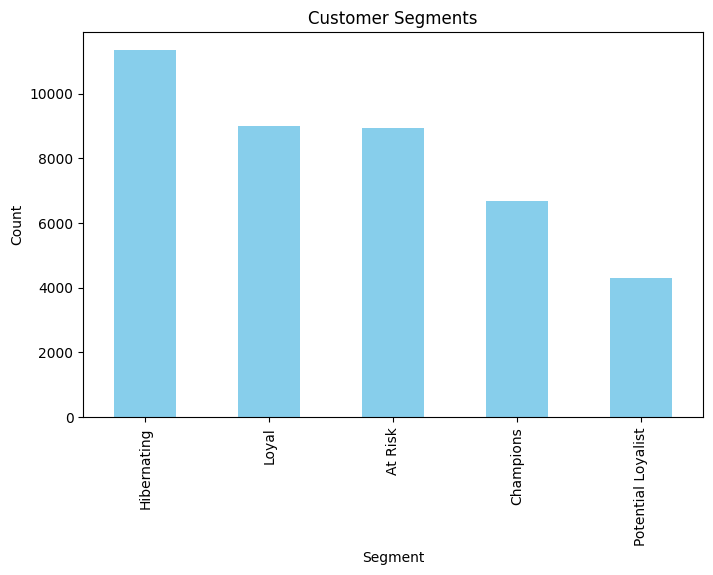

In [18]:
# Visualize
plt.figure(figsize=(8,5))
rfm['Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Customer Segments")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()


In [ ]:
# Export
rfm.to_csv("rfm_segments.csv")